# Supplemental Figure S2: DMS reactivity patterns for motifs highlighting outliers  

Data is assummed to be in the ../../data directory

# Setup

## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dms_3d_features.plotting import *

## extra functions

In [6]:
def plot_motif_outlier_boxplot_stripplot(df_motif, ax, seq):
    plot_motif_boxplot_stripplot(df_motif, ax=ax)
    all_positions = list(range(0, len(seq)))

    for pos in df_motif["r_loc_pos"]:
        data_at_pos = df_motif[df_motif["r_loc_pos"] == pos]["r_data"]
        q1 = data_at_pos.quantile(0.25)
        q3 = data_at_pos.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        outliers = data_at_pos[
            (data_at_pos < lower_bound) | (data_at_pos > upper_bound)
        ]
        ax.scatter([pos] * len(outliers), outliers, color="magenta", zorder=3, s=3)
    ax.set_xticks(all_positions)
    ax.set_xticklabels(list(seq))
    ax.set_xlabel("Residues", labelpad=2)
    ax.set_ylabel("Mutation Fraction", labelpad=2)

    publication_style_ax(ax)

## load data

In [2]:
DATA_PATH = "../../data"
REVISION_PATH = "../../data/revisions"

In [5]:
df_res = pd.read_json(f"{DATA_PATH}/raw-jsons/residues/pdb_library_1_residues.json")

# Plotting

/Users/jyesselman2/Dropbox/4_papers/2024_dms_quant_framework/dms_3d_features/plotting.py:787: UserWarning: Subplots won't fit vertically! Required height: 7.20", Figure height: 4.00". Consider increasing figure height or reducing subplot height/spacing.
  warnings.warn(


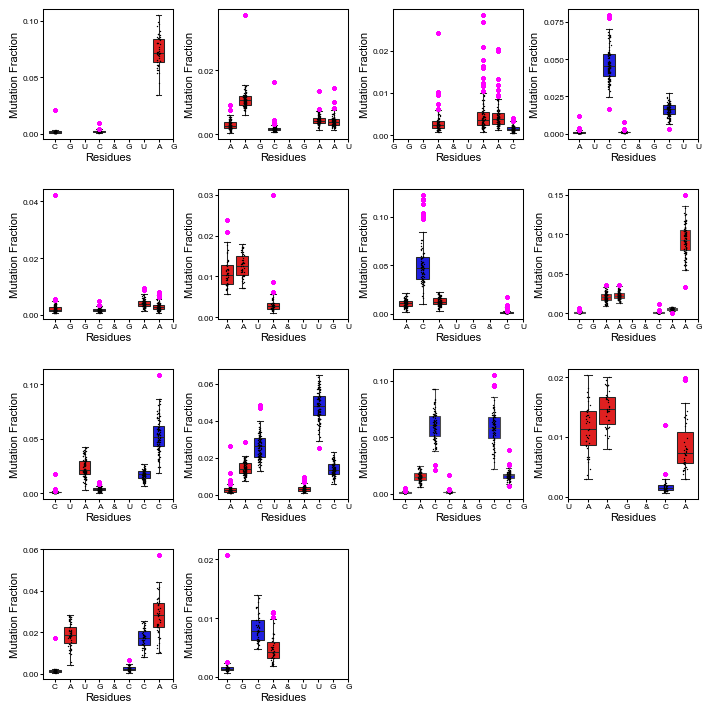

In [8]:
fig_size = (7, 6)
layout = (4, 4)
subplot_size = (1.3, 1.3)  # Each subplot is 4" x 3"
spacing = {
    "hspace": 0.45,  # horizontal spacing in inches
    "wspace": 0.50,  # vertical spacing in inches
    "margins": {"left": 0.40, "right": 0.0, "top": 0.0, "bottom": 0.50},
}

coords_list = calculate_subplot_coordinates(fig_size, layout, subplot_size, spacing)
fig = plt.figure(figsize=fig_size, dpi=100)

sequences = [
    "CGUC&GUAG",
    "AAGC&GAAU",
    "GGGA&UAAC",
    "AUCC&GCUU",
    "AGGC&GAAU",
    "AAUA&UUGU",
    "ACAUG&CU",
    "CGAAG&CAAG",
    "CUAA&UCCG",
    "AACU&ACCU",
    "CACC&GCCG",
    "UAAG&CA",
    "CAUG&CCAG",
    "CGCA&UUGG",
]

pos = 0
for seq in sequences:
    df_motif = df_res[df_res["m_sequence"] == seq]
    ax = fig.add_axes(coords_list[pos])
    plot_motif_outlier_boxplot_stripplot(df_motif, ax, seq)
    pos += 1
fig.savefig(
    "../../figures/supplemental_figures/supplemental_figure_s2.png",
    dpi=600,
    bbox_inches="tight",
)